In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import json

df = pd.read_json('../data/database-10-12.json')

#### Ändere die Spalte `ressort` zu einem Anfangsgroßbuchstaben

In [78]:
df.ressort = df.ressort.str.title()

#### Füge ein neues Feature hinzu: Themengebiet

In [79]:
topics = json.loads(open("topics/topics.json", "r").read())

df['tags_full'] = ['; '.join(tags) for tags in df['tags'].to_list()]

for topic in topics:
    df.loc[(df.title.str.contains('|'.join(topics[topic]['keywords'])) | df.tags_full.str.contains('|'.join(topics[topic]['keywords']))), 'topic'] = topic

#### Fülle alle NaN Werte aus `rankings` mit einem leeren Array

In [80]:
df['rankings'] = df['rankings'].fillna("[]")

#### Füge ein neues Feature hinzu: Ranking besser als 5. Platz

In [81]:
def high_ranking(x):
    if (type(x) == list):
        return any(ranking['score'] <= 5 for ranking in x)
    return False

df['high_ranking'] = df['rankings'].apply(high_ranking)

#### Filter die Artikel nach: Hohes Ranking vorhanden

In [82]:
df = df.loc[df.high_ranking]

#### Gruppiere die Artikel nach: Themengebiet

In [83]:
df_ressort = df.groupby(["ressort"]).size().reset_index(name='amount')
df_ressort = df_ressort.rename(columns={'ressort': 'group'})

df_ressort['color'] = "#8ecae6" # blue
df_ressort['edgecolor'] = "#219ebc" # blue

#### Gruppiere die Artikel nach: Ressort

In [84]:
df_topic = df.groupby(["topic"]).size().reset_index(name='amount')
df_topic = df_topic.rename(columns={'topic': 'group'})

df_topic['color'] = "#f2cc8f" # orange
df_topic['edgecolor'] = "#e07a5f" # orange

#### Füge die beiden enstandenen Daten in einen `DataFrame`

In [85]:
df = pd.concat([df_ressort, df_topic])

#### Sortiere die Artikel nach: Anzahl Top-Rankings (absteigend)

In [86]:
df = df.sort_values(by='amount', ascending=False)

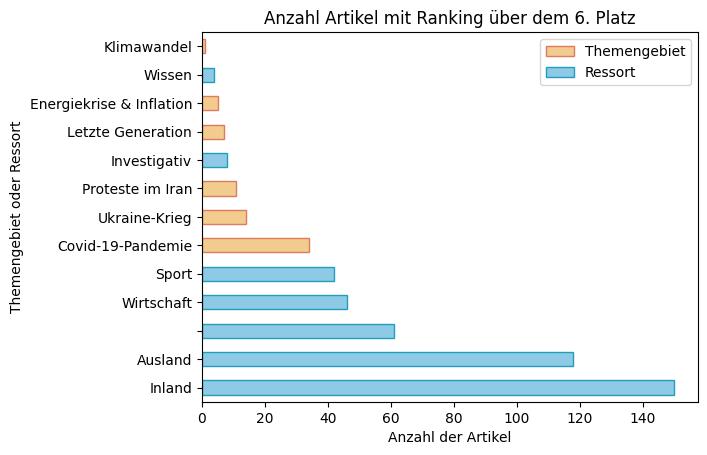

In [89]:
fig, ax1 = plt.subplots()

df.plot(ax=ax1, kind="barh", x='group', y='amount', xlabel="Anzahl der Artikel", ylabel="Themengebiet oder Ressort", color=df.color, legend=False, edgecolor=df.edgecolor)

legend_elements = [Patch(facecolor='#f2cc8f', edgecolor='#e07a5f', label='Themengebiet'), Patch(facecolor='#8ecae6', edgecolor='#219ebc', label='Ressort')]
ax1.legend(handles=legend_elements);

ax1.set_title('Anzahl Artikel mit Ranking über dem 6. Platz')
ax1.get_figure().savefig('figures/bar-ranking-ressort-topic.png', bbox_inches="tight")